# Data Analysis Interview Challenge

## Part 1:  Exploritory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_json('logins.json')

In [3]:
df['demand']=1
df=df.set_index('login_time')
df=df.resample('15min').sum()

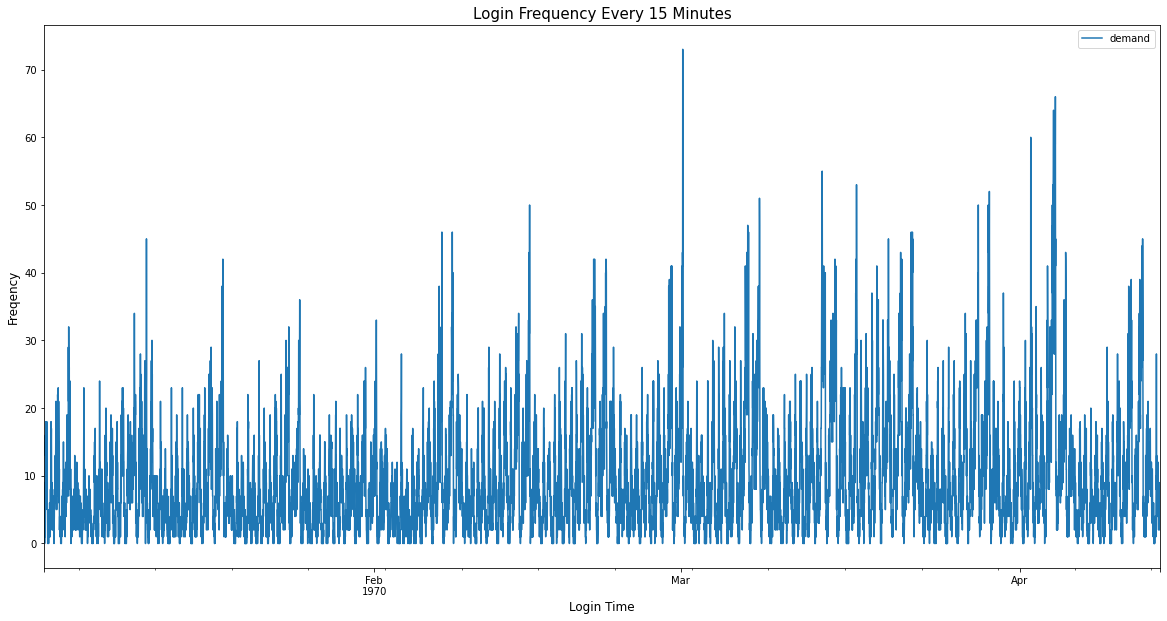

In [4]:
plt.rcParams['figure.figsize'] = [20, 10]
df.plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

There appears to be a siclicle pattern in the amount of logins.  Lets focus in on january to see if we can get a clearer picture of the pattern.  

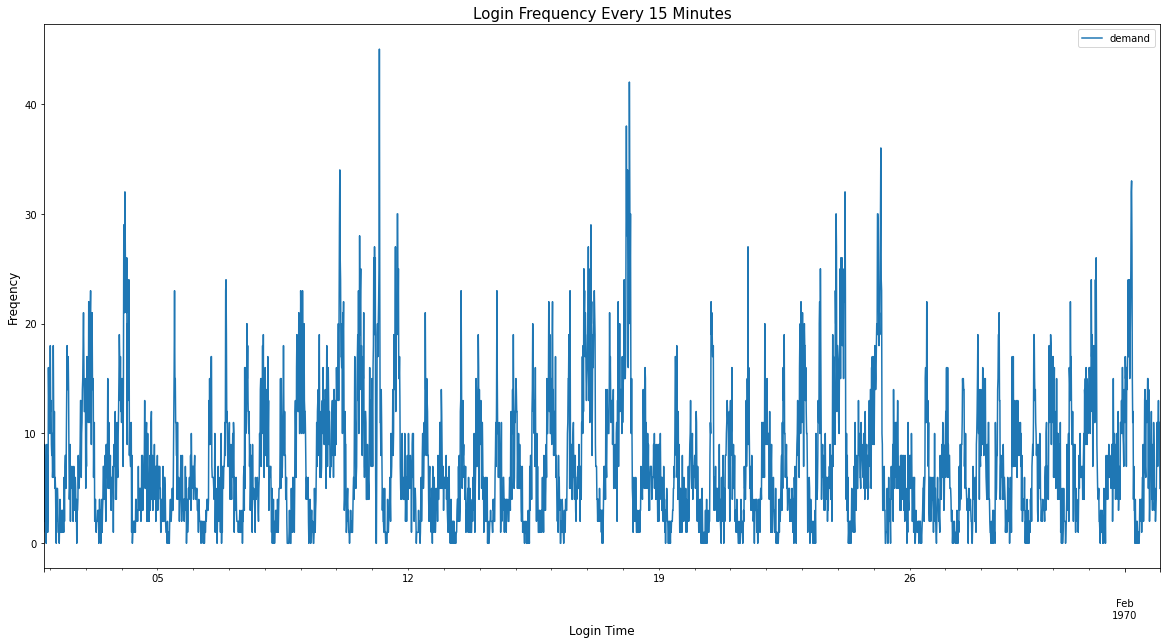

In [5]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-01-01':'1970-02-01'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

It appears there is a reccuring pattern evey week, with a spike on the 4th, 11th, 18th, and the 25th.  These were all Sundays in 1970.  Lets look at February to see if the pattern continues.  

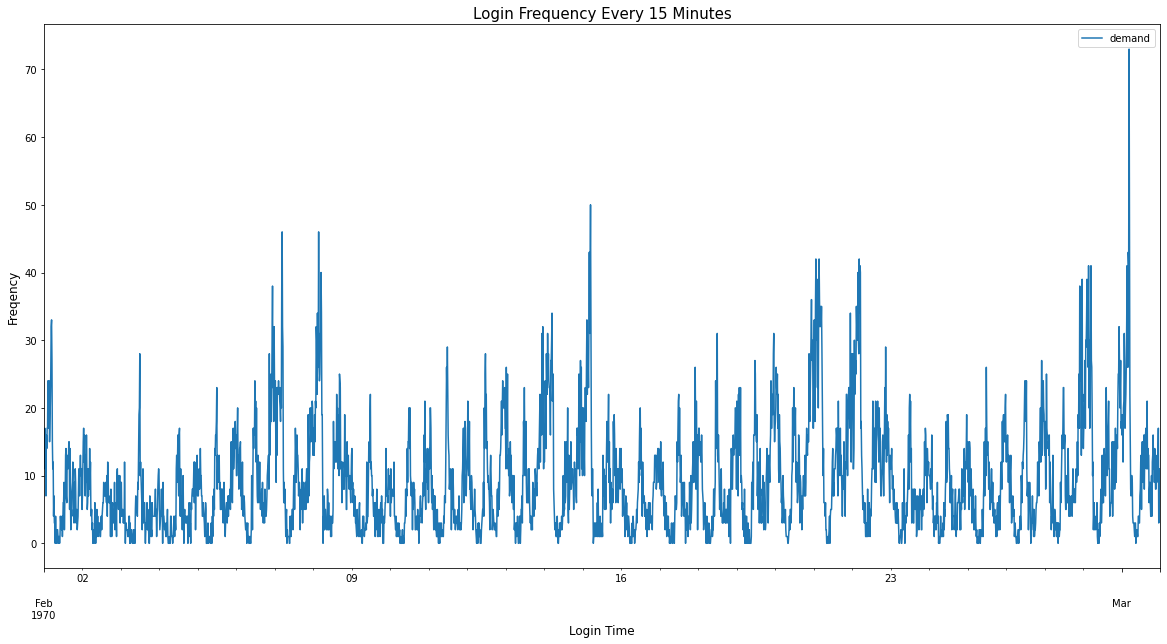

In [6]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-02-01':'1970-03-01'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

The weekly pattern of a sunday spike does not seem to be as strong in February, but it is still present, and sometimes the Sunday spike appears to be matched by a Saturday spike.  For completeness, lets check March.

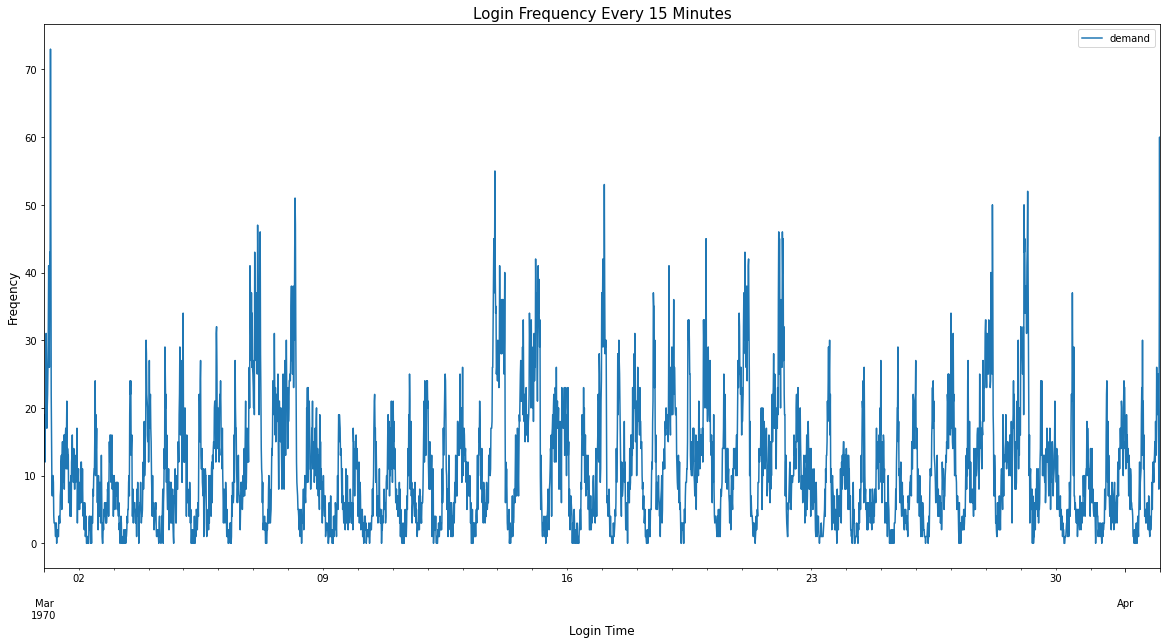

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-03-01':'1970-04-01'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

Saturday and Sunday spikes in demand are still common, but they are no longer the rule.  Here we see a spike on the 17th, which was a Tuesday.  Lets zoom in on the first week of March.

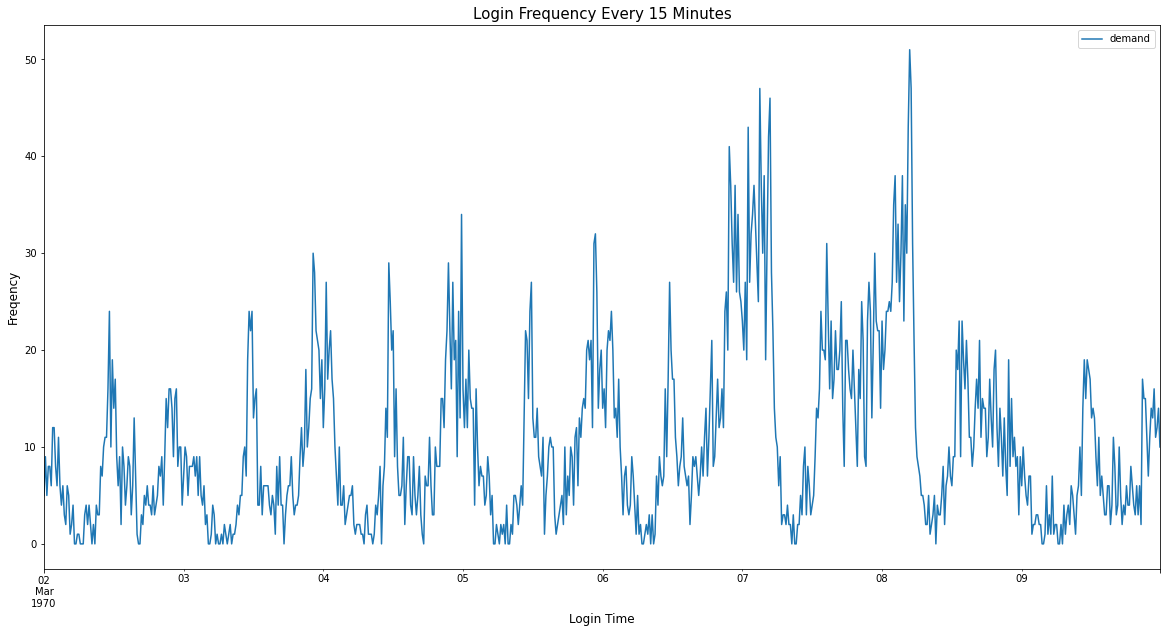

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-03-02':'1970-03-09'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

March 2nd was a Monday, and the cycles of traffic appear to increase as the week goes on, culminating in large spikes on Saturday and Sunday.  It looks like each day has its own spikes as well.    

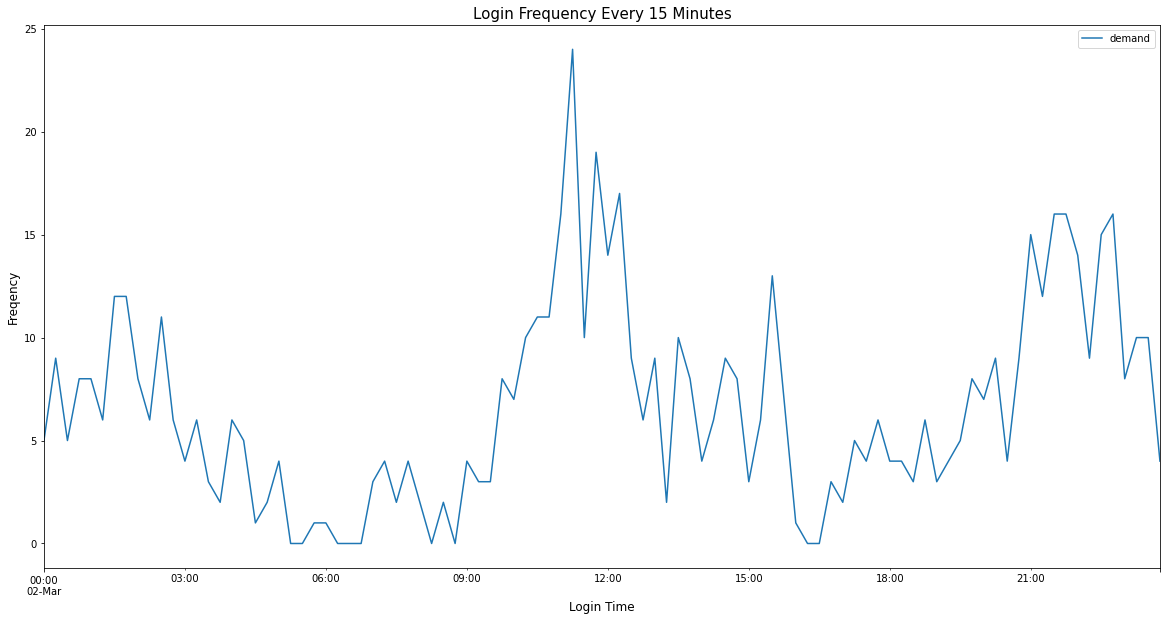

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-03-02'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

The above chart is just for March 2nd.  We can see that network traffic spikes just before noon. Lets look at one more day to see if a similar pattern occurs.

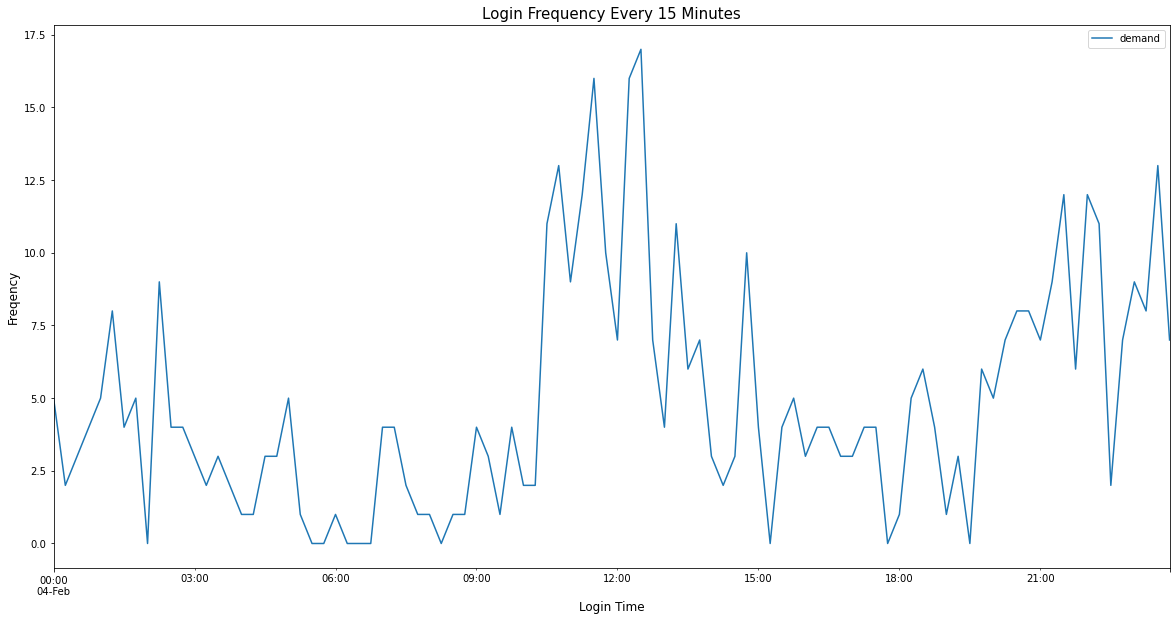

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
df.loc['1970-02-04'].plot()
plt.title('Login Frequency Every 15 Minutes',fontsize=15)
plt.xlabel('Login Time',fontsize=12)
plt.ylabel('Freqency',fontsize=12)
plt.show()

The above chart showing network traffic for February 4th, Is similar to March 2nd in that there is a spike in traffic at noon and lulls at 6AM-9AM.  There are several instances in which network traffic dropps to zero.  This should be investigated to make sure that this is not a network error, but strictly due to the fact that there is no demand to use the site.  

## Part 2: Experiment and Metrics Design 

1. The key measure of success is driver toll costs.  If you see drivers requesting to be reimbursed for more tolls, it means that they are moving between cities more often.  

2. a) I would implement the experiment by taking all drivers in both cities and randomly assigning half of thier liscense plate numbers the ability to go through tolls for free.  I would inform them of this ability, and then see if there is a significant difference between groups after one month.  

2. b) I would conduct a simple t-test betwen groups average toll usage to see if there is a significant difference between the group without free tolls and with free tolls

2. c) If the t-test proved significant we would reject the null hypothesis that subsidizing tolls has no effect on how often drive between cities.  It would be reasonable to assume, given the degree of the difference, that if the null hypotheis is rejected that subsidizing tolls for drivers does make them cross more frequently between cities.  

## Part 3: Predictive Modeling

### Cleaning

In [11]:
df3=pd.read_json('ultimate_data_challenge.json')

In [12]:
#This will create the variable active_user_months which gives us how long the customer was retained since last ride.
#active_user_months will be our response variable.
x=pd.to_datetime(df3['last_trip_date'])
y=pd.to_datetime(df3['signup_date'])
df3['active_user_months']=(x-y)/np.timedelta64(1,'M')
df3=df3.drop(columns=['signup_date','last_trip_date','phone'])

In [13]:
#lets fill average avg_rating_of_driver and avg_rating_by_driver with the mean of both variables
df3['avg_rating_of_driver'].fillna(df3['avg_rating_of_driver'].mean(),inplace=True)
df3['avg_rating_by_driver'].fillna(df3['avg_rating_by_driver'].mean(),inplace=True)

In [14]:
#and now we change our catigorical variables into k-1 dummies remembering that 0,0 is Astaphor
df3=pd.get_dummies(df3,drop_first=True)
df3['ultimate_black_user']=df3['ultimate_black_user']*1

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int32  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   active_user_months      50000 non-null  float64
 9   city_King's Landing     50000 non-null  uint8  
 10  city_Winterfell         50000 non-null  uint8  
dtypes: float64(7), int32(1), int64(1), uint8(2)
memory usage: 3.3 MB


In [19]:
df3.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active_user_months', 'city_King's Landing',
       'city_Winterfell'],
      dtype='object')

###  Modeling

In [56]:
#lets split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
X=df3.drop(columns='active_user_months')
y=df3[['active_user_months']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
#and lets scale X_train without the dummy variables and tack them back on
scaler=StandardScaler()
X_train_dropped=X_train.drop(columns=["city_King's Landing",'city_Winterfell','ultimate_black_user'])
X_train_dropped_columns=X_train_dropped.columns
X_train_scaled=scaler.fit_transform(X_train_dropped)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train_dropped_columns)
X_train_addition=X_train[["city_King's Landing",'city_Winterfell','ultimate_black_user']].reset_index()
X_train_scaled=pd.concat([X_train_scaled,X_train_addition],axis=1)
X_train_scaled=X_train_scaled.drop(columns='index')

In [57]:
#lets train our multiple regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(X_train_scaled,y_train)

In [58]:
#lets look at R^2 for training data
model.score(X_train_scaled,y_train)

0.09886634372393921

In [59]:
#lets scale test data and look at the R^2 for that as well
scaler=StandardScaler()
X_test_dropped=X_test.drop(columns=["city_King's Landing",'city_Winterfell','ultimate_black_user'])
X_test_dropped_columns=X_test_dropped.columns
X_test_scaled=scaler.fit_transform(X_test_dropped)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test_dropped_columns)
X_test_addition=X_test[["city_King's Landing",'city_Winterfell','ultimate_black_user']].reset_index()
X_test_scaled=pd.concat([X_test_scaled,X_test_addition],axis=1)
X_test_scaled=X_test_scaled.drop(columns='index')
#lets look at R^2 for training data
model.score(X_test_scaled,y_test)

0.09507809257606248

Our R^2 for both train and test data is extreamly low, which indicates that our model is not a great fit. In fact, its quite terrible at explaining the variation in active_user_months.  There should be futher investigation using other models to better describe the relationship between these variables.  

In [60]:
# Lets look at coefficionts
co=pd.DataFrame(model.coef_,columns=X_train_scaled.columns).T
co.columns=['coefficients']
co

,coefficients
trips_in_first_30_days,0.257681
avg_rating_of_driver,-0.038999
avg_surge,-0.083746
surge_pct,0.090535
weekday_pct,0.030645
avg_dist,-0.210716
avg_rating_by_driver,-0.062922
city_King's Landing,1.098872
city_Winterfell,0.251156
ultimate_black_user,0.635007


As we can see in the above chart, our model says that a customers location has a large effect on how many months a user will remain active.  However, the largest indicator is most likely trips_in_the_first_30_days because this is more variable.  A customer can only live in Kings Landing once, but they can potentially take many rides in the first 30 days.  Ultimate driving service should focus on enticing new riders into taking more rides during their first 30 days.  This may have an impact by increasing customer retention towards, and beyond six months.  